In [12]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC
from tensorflow import keras  
from keras.models import Sequential  
from keras.layers import Dense 
from keras.utils import to_categorical  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import StratifiedKFold  
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import ConfusionMatrixDisplay  

In [15]:
df=pd.read_excel(r'C:\Users\Wondwossen\Desktop\BI group 8 project\data\Obesity_Dataset.xlsx', index_col=0)  
df.columns=df.columns.str.strip()
df.head()


,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
Sex,,,,,,,,,,,,,,
2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 2 to 2
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1610 non-null   int64
 1   Height                             1610 non-null   int64
 2   Overweight_Obese_Family            1610 non-null   int64
 3   Consumption_of_Fast_Food           1610 non-null   int64
 4   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 5   Number_of_Main_Meals_Daily         1610 non-null   int64
 6   Food_Intake_Between_Meals          1610 non-null   int64
 7   Smoking                            1610 non-null   int64
 8   Liquid_Intake_Daily                1610 non-null   int64
 9   Calculation_of_Calorie_Intake      1610 non-null   int64
 10  Physical_Excercise                 1610 non-null   int64
 11  Schedule_Dedicated_to_Technology   1610 non-null   int64
 12  Type_of_Transportation_Used 

<Axes: >

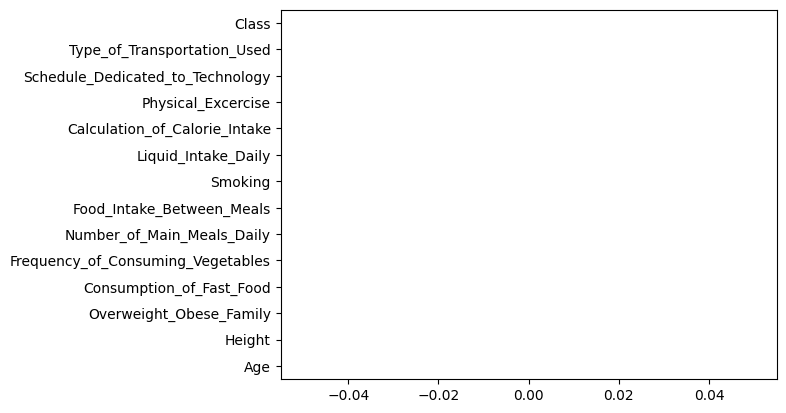

In [18]:
df.isnull().sum().plot(kind='barh')

In [19]:
df['Class'].value_counts()

Class
2    658
3    592
4    287
1     73
Name: count, dtype: int64

In [20]:
#create X and y
X=df.drop('Class',axis=1)
y=df['Class']

In [21]:
# Encoding the target variable  
labelencoder = LabelEncoder()  
y = labelencoder.fit_transform(y)  

In [22]:

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# Feature Scaling  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  
print(X_train)
print(X_test)

[[ 0.38469509 -0.32705181  0.43001465 ...  1.30413431 -0.00444054
  -1.08515385]
 [-1.04322214 -0.95916876  0.43001465 ... -0.18366462 -0.00444054
   0.88989772]
 [-0.63524579 -0.95916876  0.43001465 ...  1.30413431 -1.43429535
   1.54824824]
 ...
 [-0.83923396 -0.20062842  0.43001465 ... -0.92756408 -0.00444054
   0.88989772]
 [ 0.58868327  0.17864175  0.43001465 ...  1.30413431 -0.00444054
   0.88989772]
 [ 0.79267144  0.6843353   0.43001465 ...  1.30413431  1.42541426
  -1.08515385]]
[[-0.83923396 -1.08559215  0.43001465 ...  1.30413431 -0.00444054
   0.88989772]
 [ 1.71061824 -1.33843892  0.43001465 ... -0.18366462 -1.43429535
  -1.08515385]
 [-0.94122805  1.19002886  0.43001465 ... -0.18366462  1.42541426
   0.88989772]
 ...
 [-0.94122805 -0.95916876  0.43001465 ... -0.18366462 -0.00444054
   0.88989772]
 [-1.24721031 -0.20062842  0.43001465 ... -0.92756408  1.42541426
   0.88989772]
 [-0.02328126 -0.70632198  0.43001465 ...  1.30413431 -1.43429535
  -1.08515385]]


(1288, 13)
(1288,)
Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3951 - loss: 1.2959
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7028 - loss: 0.8401
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.7232
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6894 - loss: 0.7125
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7306 - loss: 0.6128
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7287 - loss: 0.6331
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.6091
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7401 - loss: 0.5851
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7578 - loss: 0.5483
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5408
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7802 - loss: 0.5448
Epoch 12/50
129/129 ━━━━━━━━━━━━

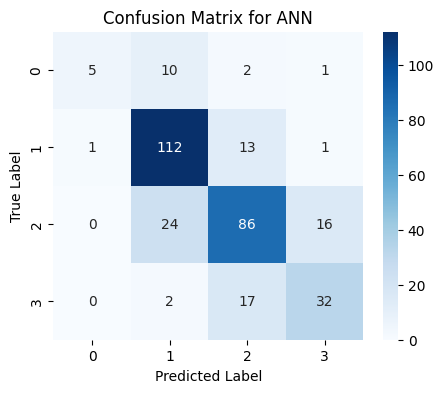

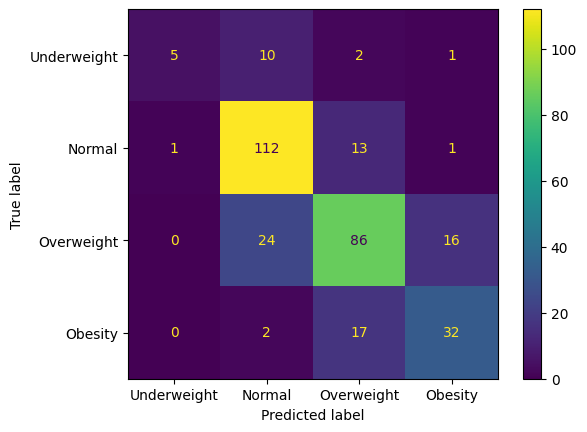

[[  5  10   2   1]
 [  1 112  13   1]
 [  0  24  86  16]
 [  0   2  17  32]]


In [38]:
# Check shapes  
print(X_train.shape)  # Should be (num_samples, num_features)  
print(y_train.shape)  # Should be (num_samples,)  

# Check for NaN or infinite values  
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):  
    raise ValueError("X_train contains NaN or infinite values.")  
if np.any(np.isnan(y_train)) or np.any(np.isinf(y_train)):  
    raise ValueError("y_train contains NaN or infinite values.")  

# Define the ANN model  
model = Sequential()  
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))  # Ensure input_dim is correct  
model.add(Dense(16, activation='relu'))  
model.add(Dense(4, activation='softmax'))  # Ensure this matches the number of unique classes in y_train  

# Compile the model  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# Fit the model  
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)  

# Evaluate the ANN  
ann_score = model.evaluate(X_test, y_test)  
print(f'ANN Model Accuracy: {ann_score[1] * 100:.2f}%')  

# Get predictions  
y_pred_prob = model.predict(X_test)  
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class labels  

# Generate confusion matrix  
cm = confusion_matrix(y_test, y_pred)  

# Plot confusion matrix  
plt.figure(figsize=(5, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))  
plt.ylabel('True Label')  
plt.xlabel('Predicted Label')  
plt.title('Confusion Matrix for ANN') 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Underweight','Normal','Overweight','Obesity']).plot()  
plt.show()  
plt.show()
print(cm)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.73      0.84      0.78       127
           2       0.71      0.66      0.68       126
           3       0.64      0.67      0.65        51

    accuracy                           0.71       322
   macro avg       0.73      0.61      0.63       322
weighted avg       0.71      0.71      0.70       322



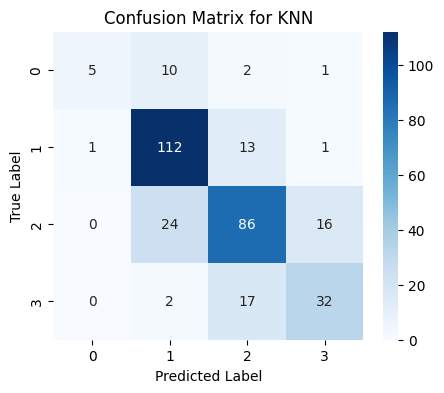

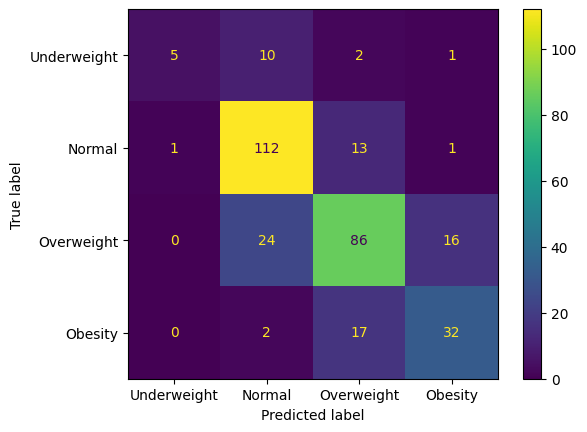

[[  5  10   2   1]
 [  1 112  13   1]
 [  0  24  86  16]
 [  0   2  17  32]]


In [39]:
# 2. K Nearest Neighbors (KNN)  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  
knn_predictions = knn.predict(X_test)  

print("KNN Classification Report:")  
print(classification_report(y_test, knn_predictions))  
# Plot confusion matrix  
plt.figure(figsize=(5, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))  
plt.ylabel('True Label')  
plt.xlabel('Predicted Label')  
plt.title('Confusion Matrix for KNN') 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Underweight','Normal','Overweight','Obesity']).plot()  
plt.show()  
print(cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.84      0.93      0.88       127
           2       0.87      0.87      0.87       126
           3       0.92      0.86      0.89        51

    accuracy                           0.87       322
   macro avg       0.91      0.78      0.81       322
weighted avg       0.87      0.87      0.86       322



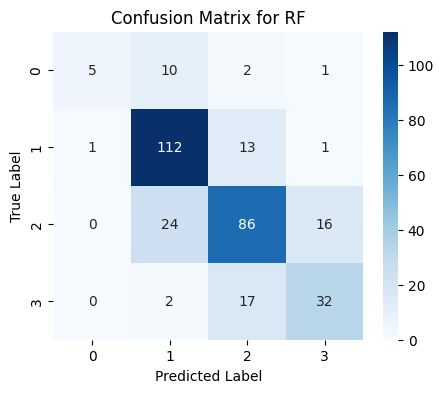

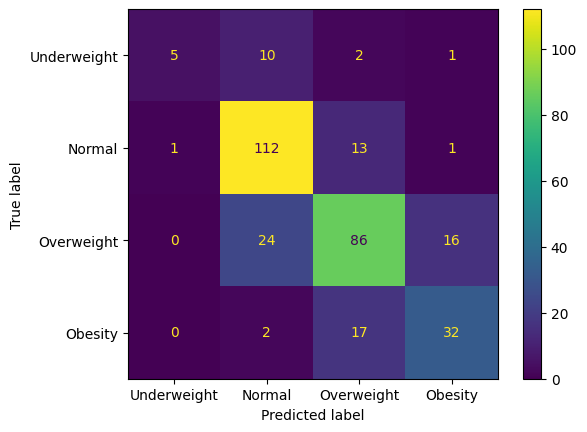

[[  5  10   2   1]
 [  1 112  13   1]
 [  0  24  86  16]
 [  0   2  17  32]]


In [40]:
# 3. Random Forest (RF)  
rf = RandomForestClassifier(n_estimators=100, random_state=0)  
rf.fit(X_train, y_train)  
rf_predictions = rf.predict(X_test)  

print("Random Forest Classification Report:")  
print(classification_report(y_test, rf_predictions)) 
# Plot confusion matrix  
plt.figure(figsize=(5, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))  
plt.ylabel('True Label')  
plt.xlabel('Predicted Label')  
plt.title('Confusion Matrix for RF') 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Underweight','Normal','Overweight','Obesity']).plot()  
plt.show()  
plt.show()
print(cm)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.39      0.52        18
           1       0.71      0.85      0.77       127
           2       0.74      0.63      0.68       126
           3       0.68      0.71      0.69        51

    accuracy                           0.72       322
   macro avg       0.73      0.65      0.67       322
weighted avg       0.72      0.72      0.71       322

Confusion Matrix for KNN:
[[  5  10   2   1]
 [  1 107  17   2]
 [  0  27  83  16]
 [  0   2  15  34]]
Confusion Matrix for Random Forest:
[[  8   9   1   0]
 [  0 118   9   0]
 [  0  13 109   4]
 [  0   0   7  44]]
Confusion Matrix for SVM:
[[  7  10   1   0]
 [  2 108  15   2]
 [  0  31  80  15]
 [  0   3  12  36]]


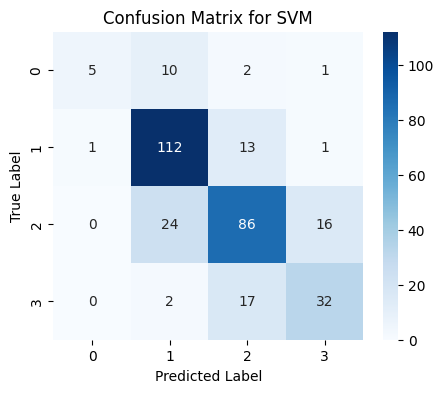

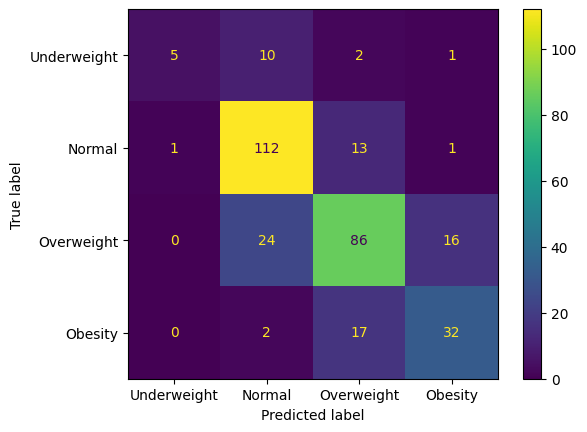

[[  5  10   2   1]
 [  1 112  13   1]
 [  0  24  86  16]
 [  0   2  17  32]]


In [42]:
# 4. Support Vector Machine (SVM)  
svm = SVC(kernel='linear', random_state=0)  
svm.fit(X_train, y_train)  
svm_predictions = svm.predict(X_test)  

print("SVM Classification Report:")  
print(classification_report(y_test, svm_predictions))  

# Confusion Matrices (Optional)  
print("Confusion Matrix for KNN:")  
print(confusion_matrix(y_test, knn_predictions))  

print("Confusion Matrix for Random Forest:")  
print(confusion_matrix(y_test, rf_predictions))  

print("Confusion Matrix for SVM:")  
print(confusion_matrix(y_test, svm_predictions)) 
# Plot confusion matrix  
# Plot confusion matrix  
plt.figure(figsize=(5, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))  
plt.ylabel('True Label')  
plt.xlabel('Predicted Label')  
plt.title('Confusion Matrix for SVM') 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Underweight','Normal','Overweight','Obesity']).plot()  
plt.show()  
plt.show()
print(cm)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


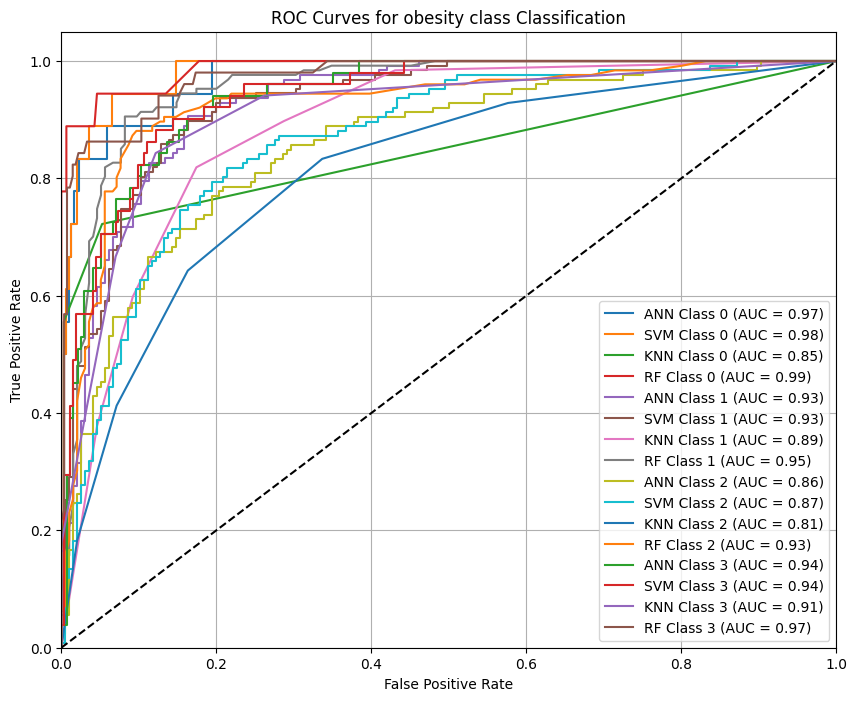

In [43]:
# 1. Train ANN  
num_classes = 4  # Adjust based on your dataset  
ann_model = Sequential()  
ann_model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))  
ann_model.add(Dense(16, activation='relu'))  
ann_model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification  
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)  

# Get predictions (probabilities for each class)  
y_scores_ann = ann_model.predict(X_test)  # This will give you predictions for all classes  

# 2. Train SVM  
svm_model = SVC(probability=True)  
svm_model.fit(X_train, y_train)  
y_scores_svm = svm_model.predict_proba(X_test)  # This will give you predictions for all classes  

# 3. Train KNN  
knn_model = KNeighborsClassifier()  
knn_model.fit(X_train, y_train)  
y_scores_knn = knn_model.predict_proba(X_test)  # This will give you predictions for all classes  

# 4. Train Random Forest  
rf_model = RandomForestClassifier()  
rf_model.fit(X_train, y_train)  
y_scores_rf = rf_model.predict_proba(X_test)  # This will give you predictions for all classes  

# Function to plot ROC curve for each class  
def plot_roc_curve(fpr, tpr, label):  
    plt.plot(fpr, tpr, label=label)  

# Calculate and plot ROC curve for each model and each class  
plt.figure(figsize=(10, 8))  

for class_index in range(num_classes):  
    # ANN ROC  
    fpr_ann, tpr_ann, _ = roc_curve(y_test, y_scores_ann[:, class_index], pos_label=class_index)  
    roc_auc_ann = auc(fpr_ann, tpr_ann)  
    plot_roc_curve(fpr_ann, tpr_ann, f"ANN Class {class_index} (AUC = {roc_auc_ann:.2f})")  

    # SVM ROC  
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm[:, class_index], pos_label=class_index)  
    roc_auc_svm = auc(fpr_svm, tpr_svm)  
    plot_roc_curve(fpr_svm, tpr_svm, f"SVM Class {class_index} (AUC = {roc_auc_svm:.2f})")  

    # KNN ROC  
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn[:, class_index], pos_label=class_index)  
    roc_auc_knn = auc(fpr_knn, tpr_knn)  
    plot_roc_curve(fpr_knn, tpr_knn, f"KNN Class {class_index} (AUC = {roc_auc_knn:.2f})")  

    # Random Forest ROC  
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf[:, class_index], pos_label=class_index)  
    roc_auc_rf = auc(fpr_rf, tpr_rf)  
    plot_roc_curve(fpr_rf, tpr_rf, f"RF Class {class_index} (AUC = {roc_auc_rf:.2f})")  

# Formatting the plot  
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for obesity class Classification')  
plt.legend(loc='lower right')  
plt.grid()  
plt.show()  